In [15]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [16]:
# Importing dataset

df=pd.read_csv('marketing_data.csv')

In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [74]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [20]:
# Replace the column name 'Income' with '  Income  '
df = df.rename(columns={' Income ': 'Income'})

In [21]:
# Check for missing values in the entire dataframe
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [ ]:
1.2 Income values for a few customers are missing. Perform missing value imputation.
Assume that the customers with similar education and marital status make the same yearly income, on average.
You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status. 

In [22]:
# Remove commas and dollar signs from the 'Income' column and convert it to numeric
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

# Create a new DataFrame with unique combinations of education and marital status
unique_combinations = df[['Education', 'Marital_Status']].drop_duplicates()

# Iterate over the unique combinations and impute missing values
for index, row in unique_combinations.iterrows():
    education = row['Education']
    marital_status = row['Marital_Status']

    # Calculate the average income for the specific combination of education and marital status
    average_income = df[(df['Education'] == education) & (df['Marital_Status'] == marital_status)]['Income'].mean()

    # Impute missing values based on the calculated average income
    df.loc[(df['Education'] == education) & (df['Marital_Status'] == marital_status) & (df['Income'].isnull()), 'Income'] = average_income

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64


In [24]:
# Create variables for total number of children and total spending
total_children = df['Kidhome'].sum()

# Calculate current year
current_year = datetime.now().year

# Calculate average age
df['Age'] = current_year - df['Year_Birth']
average_age = df['Age'].mean()


# Calculate total spending
total_spending = df[['MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum().sum()

# Print or use the variables as needed
print(f"Total Number of Children: {total_children}")
print(f"Average Age: {average_age}")
print(f"Total Spending: {total_spending}")

Total Number of Children: 995
Average Age: 54.19419642857143
Total Spending: 1356988


In [ ]:
1.4 Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

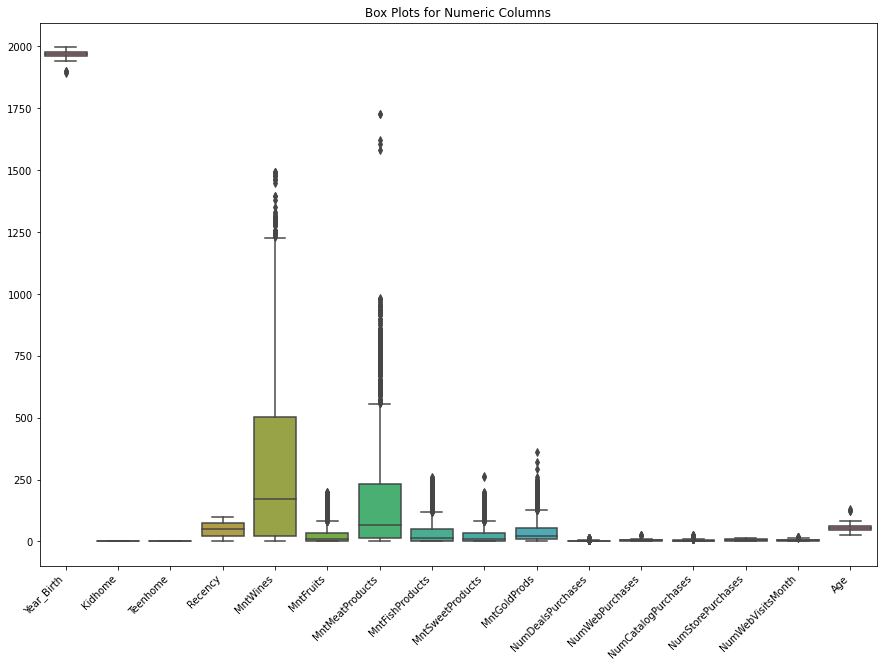

<Figure size 1080x720 with 0 Axes>

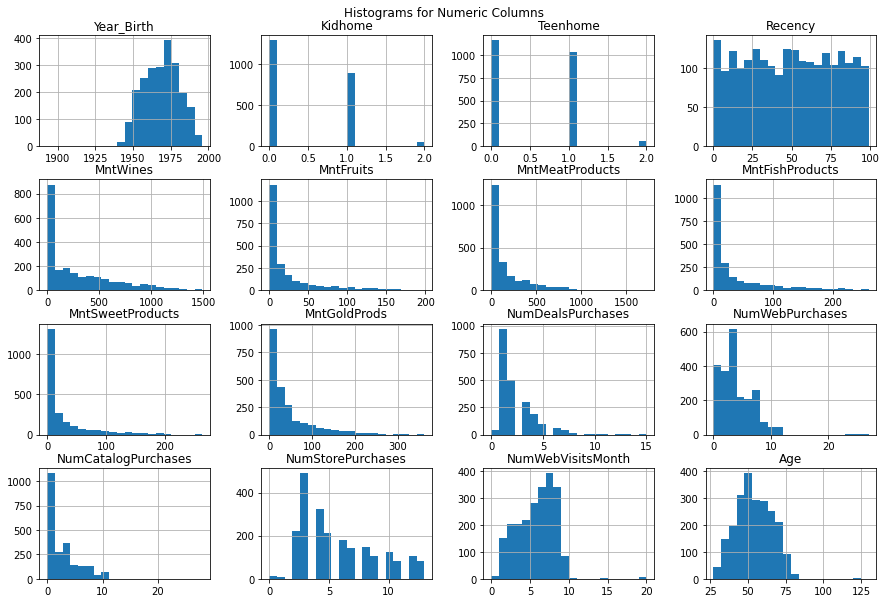

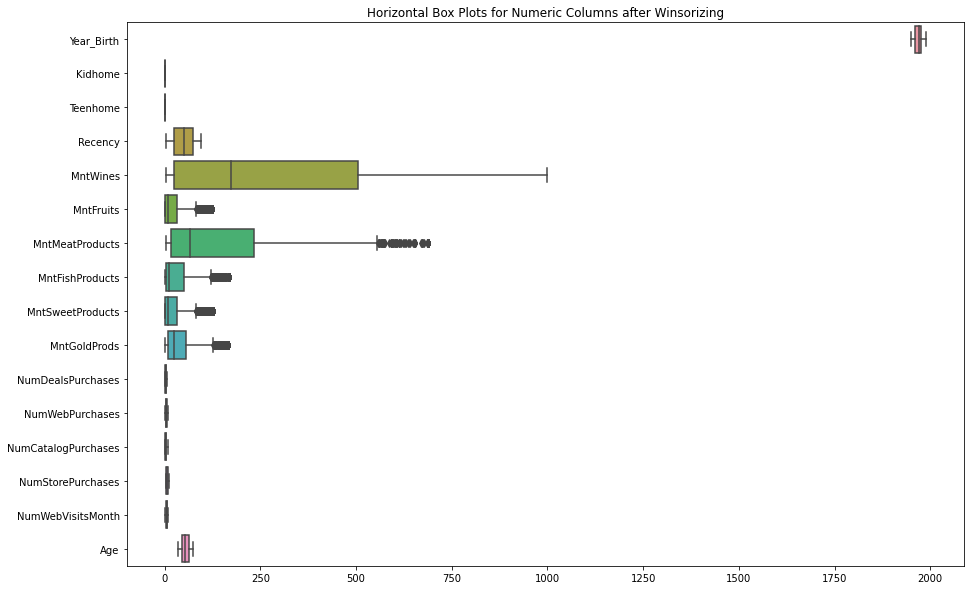

In [25]:
from scipy.stats.mstats import winsorize

# Select numeric columns for analysis
numeric_columns = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
                   'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Box Plots for Numeric Columns')
plt.show()

# Histograms
plt.figure(figsize=(15, 10))
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numeric Columns', y=0.92)
plt.show()

# Outlier treatment using Winsorizing
df[numeric_columns] = df[numeric_columns].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

# Check the updated box plots after outlier treatment
# Check the updated box plots after outlier treatment (horizontal)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns], orient="h")
plt.title('Horizontal Box Plots for Numeric Columns after Winsorizing')
plt.show()

In [ ]:
1.5 Use ordinal encoding and one hot encoding according to different types of categorical variables.

In [26]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding for 'Education'
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
df['Education'] = ordinal_encoder.fit_transform(df[['Education']])

# One-hot encoding for 'Marital_Status' and 'Country'
df = pd.get_dummies(df, columns=['Marital_Status', 'Country'], drop_first=True)

In [27]:
# Print unique values of 'Education'
print("Unique values of 'Education':")
print(df['Education'].unique())

Unique values of 'Education':
[2. 4. 1. 3. 0.]


In [28]:
# Print the first few rows of the modified DataFrame
print(df.head())

      ID  Year_Birth  Education   Income  Kidhome  Teenhome Dt_Customer  \
0   1826        1970        2.0  84835.0        0         0     6/16/14   
1      1        1961        2.0  57091.0        0         0     6/15/14   
2  10476        1958        2.0  67267.0        0         1     5/13/14   
3   1386        1967        2.0  32474.0        1         1     5/11/14   
4   5371        1988        2.0  21474.0        1         0      4/8/14   

   Recency  MntWines  MntFruits  ...  Marital_Status_Together  \
0        4       189        104  ...                        0   
1        4       464          5  ...                        0   
2        4       134         11  ...                        0   
3        4        10          0  ...                        1   
4        4         6         16  ...                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Country_CA  Country_GER  \
0                     0                    0           0            0   
1           

In [ ]:
1.6 Create a heatmap to showcase the correlation between different pairs of variables.

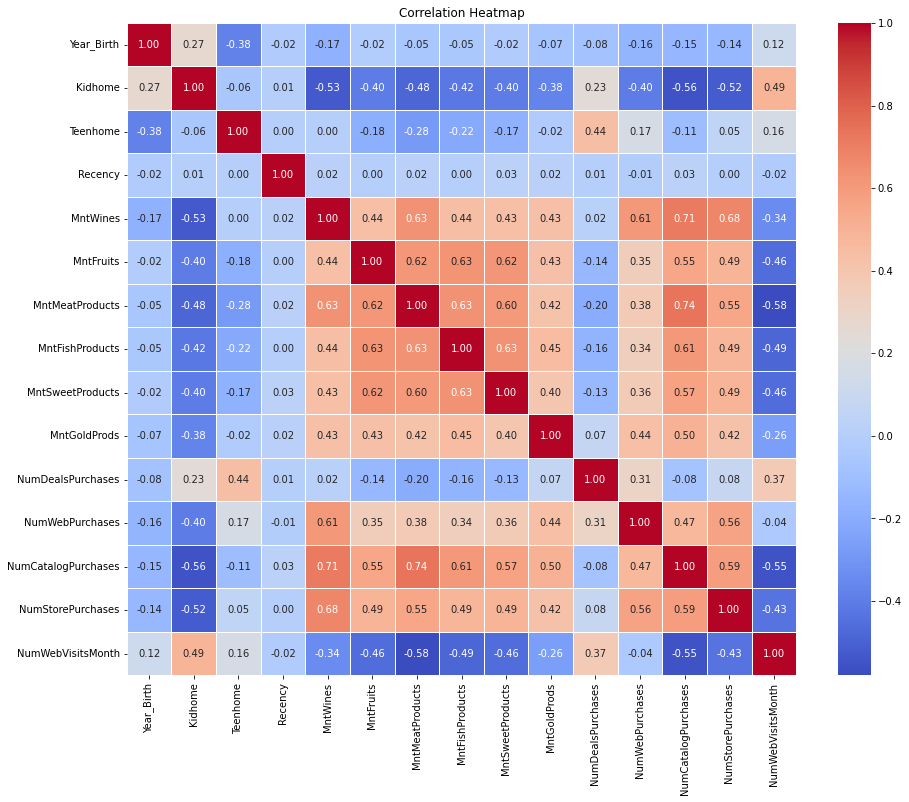

In [29]:
correlation_matrix = df[['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
                         'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                         'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                         'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
From the heatmap we can observe that strongest correlation is between those who buy meat also purchase from catalog(0.72) 
Strongest Negative correlation is between Meat buyers and Website visits(-0.54)

In [ ]:
2.Test the following hypotheses:

2.1 Older people are not as tech-savvy and probably prefer shopping in-store.
2.2 Customers with kids probably have less time to visit a store and would prefer to shop online.
2.3 Other distribution channels may cannibalize sales at the store.
2.4 Does the US fare significantly better than the rest of the world in terms of total purchases?


In [30]:
# 1. Older people prefer in-store shopping:

from scipy.stats import ttest_ind

# Hypothesis Test
in_store_age = df[df['NumStorePurchases'] == 1]['Year_Birth']
online_age = df[df['NumStorePurchases'] == 0]['Year_Birth']

t_stat, p_value = ttest_ind(in_store_age, online_age)

# Print Results
print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence that the average age of in-store shoppers is different from online shoppers.")
else:
    print("Fail to reject the null hypothesis.")

Test Statistic: nan
P-value: nan
Fail to reject the null hypothesis.


In [31]:
# 2. Customers with kids prefer online shopping:

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['NumWebPurchases'], [df['Kidhome']])

# Perform the chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-squared Statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of an association between variables.")
else:
    print("Fail to reject the null hypothesis. No significant evidence of an association.")

Chi-squared Statistic: 449.8280224245921
P-value: 4.025222395568872e-92
Reject the null hypothesis. There is evidence of an association between variables.


In [32]:
# 3. Other distribution channels cannibalize in-store sales:

# Hypothesis Test
correlation_coefficient = df['NumStorePurchases'].corr(df['NumCatalogPurchases'] + df['NumWebPurchases'])

# Print Results
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.6739295693844819


In [ ]:
Moderately positive correlation could imply that customers who make more in-store purchases are also likely to engage in catalog 
and web purchases. 
It may be an indication that these different distribution channels are complementary rather than cannibalizing each other.

In [33]:
# 4 Does the US fare significantly better than the rest of the world in terms of total purchases?

from scipy.stats import ttest_ind

# Calculate 'TotalPurchases' as the sum of specified columns
df['TotalPurchases'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Hypothesis Test
us_purchases = df[df['Country_US'] == 1]['TotalPurchases']
other_countries_purchases = df[df['Country_US'] == 0]['TotalPurchases']

t_stat, p_value = ttest_ind(us_purchases, other_countries_purchases)

# Print Results
print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence that the average total purchases in the US are different from the rest of the world.")
else:
    print("Fail to reject the null hypothesis, US does not fare significantly better than the rest of the world in terms of total purchases .")

Test Statistic: 0.19018101513306365
P-value: 0.8491845353527558
Fail to reject the null hypothesis, US does not fare significantly better than the rest of the world in terms of total purchases .


In [ ]:
3. Use appropriate visualization to help analyze the following:

3.1 Which products are performing the best, and which are performing the least in terms of revenue?
3.2 Is there any pattern between the age of customers and the last campaign acceptance rate?
3.3 Which Country has the greatest number of customers who accepted the last campaign?
3.4 Do you see any pattern in the no. of children at home and total spend?
    Education background of the customers who complained in the last 2 years.


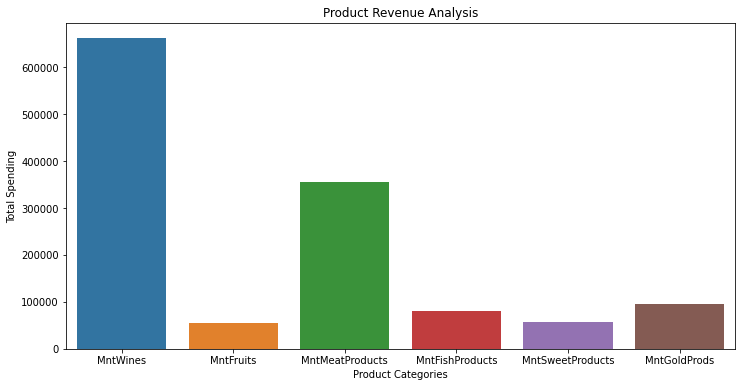

In [34]:
# 3.1 Product Performance: Revenue Analysis
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[product_columns].sum(axis=1)
# Bar plot for product revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=product_columns, y=df[product_columns].sum(), errorbar=None)
plt.title('Product Revenue Analysis')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.show()

/tmp/ipykernel_78/2735636658.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=age_bins, y='Response', data=df, ci=None)


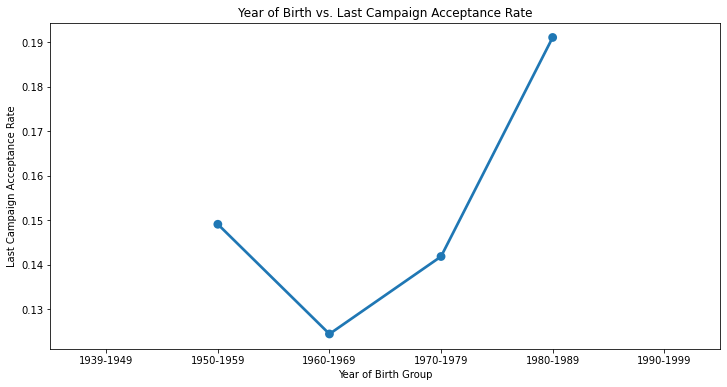

In [36]:
# 3.2 Age vs. Last Campaign Acceptance Rate

# Create age bins
age_bins = pd.cut(df['Year_Birth'], bins=[1940, 1950, 1960, 1970, 1980, 1990, 2000], right=False, labels=['1939-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999'])

# Create a point plot 
plt.figure(figsize=(12, 6))
sns.pointplot(x=age_bins, y='Response', data=df, ci=None)
plt.title('Year of Birth vs. Last Campaign Acceptance Rate')
plt.xlabel('Year of Birth Group')
plt.ylabel('Last Campaign Acceptance Rate')
plt.show()

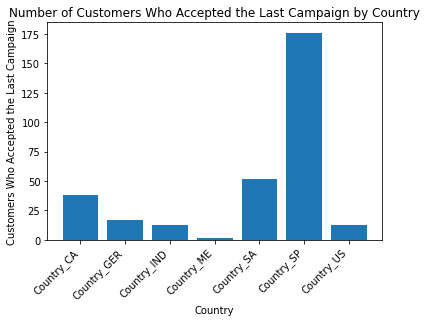

Country with the greatest number of customers who accepted the last campaign: Country_SP


In [42]:
# 3.3 Which Country has the greatest number of customers who accepted the last campaign?

# Define the list of country columns
country_columns = ['Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']

# Sum the counts of customers who accepted the last campaign across all specified countries
n_accepted_per_country = df[df['Response'] == True][country_columns].sum()

# Create a bar chart to show the number of customers who accepted the last campaign by country
plt.bar(n_accepted_per_country.index, n_accepted_per_country.values)
plt.xlabel('Country')
plt.ylabel('Customers Who Accepted the Last Campaign')
plt.title('Number of Customers Who Accepted the Last Campaign by Country')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed
plt.show()

# Find the country with the greatest number of customers who accepted the last campaign
country_with_most_accepted = n_accepted_per_country.idxmax()

# Display the country with the greatest number of customers who accepted the last campaign
print("Country with the greatest number of customers who accepted the last campaign:", country_with_most_accepted)

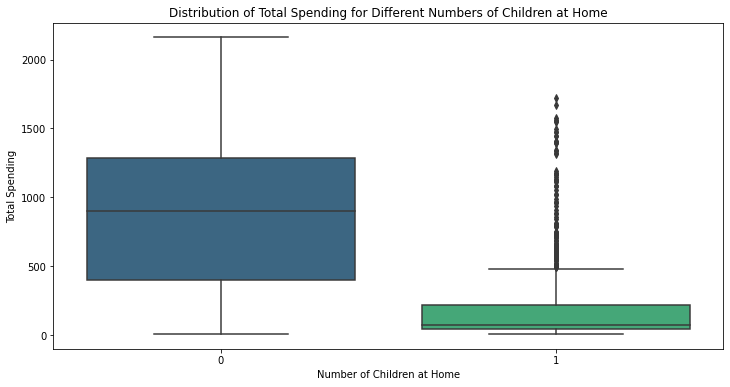

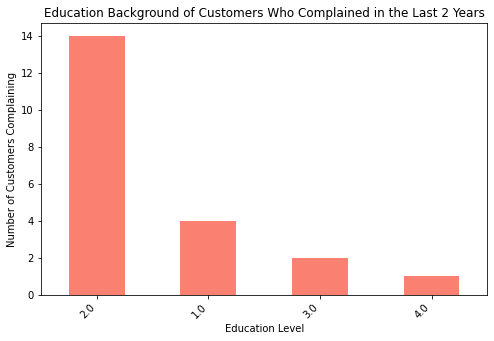

In [45]:
#  3.4 Correlation between number of children at home and total spend
# Box plot to visualize the distribution of total spending for different numbers of children at home
plt.figure(figsize=(12, 6))
sns.boxplot(x='Kidhome', y='Total_Spending', data=df, palette='viridis')
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Spending')
plt.title('Distribution of Total Spending for Different Numbers of Children at Home')
plt.show()

# 3.4 Bar chart to show the education background of customers who complained in the last 2 years
plt.figure(figsize=(8, 5))
education_of_complaining_customers = df[df['Complain'] == 1]['Education'].value_counts()
education_of_complaining_customers.plot(kind='bar', color='salmon')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers Complaining')
plt.title('Education Background of Customers Who Complained in the Last 2 Years')
plt.xticks(rotation=45, ha='right')
plt.show()